<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial_Intelligence_Course/blob/main/GK_DuDoanVanTay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

#Kết nối với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Giai nen tập dữ liệu rar
!apt-get install -y unrar

rar_file_path = "/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1/chitay.rar" 
extract_path = "/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1" 
!unrar x '{rar_file_path}' '{extract_path}'

In [ ]:
# Khai báo các thông số cho việc train mô hình
batch_size = 16
epochs = 30
num_classes = 6
input_shape = (150, 150, 1)

In [ ]:
# Chuẩn bị dữ liệu huấn luyện và xác thực
train_data = '/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1/chitay/Training'
valid_data = '/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1/chitay/Test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 1458 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'Doctor': 0,
 'Engineer': 1,
 'Farmer': 2,
 'Policeman': 3,
 'Singer': 4,
 'Teacher': 5}

In [ ]:
# Xây dựng mô hình CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
history = model.fit(train_dataset,epochs=epochs)

Epoch 1/30
46/46 [==============================] - 10s 221ms/step - loss: 1.2972 - accuracy: 0.4890
Epoch 2/30
46/46 [==============================] - 10s 226ms/step - loss: 1.2405 - accuracy: 0.5171
Epoch 3/30
46/46 [==============================] - 10s 222ms/step - loss: 1.2205 - accuracy: 0.5240
Epoch 4/30
46/46 [==============================] - 9s 196ms/step - loss: 1.1752 - accuracy: 0.5583
Epoch 5/30
46/46 [==============================] - 10s 224ms/step - loss: 1.1508 - accuracy: 0.5494
Epoch 6/30
46/46 [==============================] - 10s 220ms/step - loss: 1.1566 - accuracy: 0.5727
Epoch 7/30
46/46 [==============================] - 9s 200ms/step - loss: 1.1190 - accuracy: 0.5706
Epoch 8/30
46/46 [==============================] - 10s 223ms/step - loss: 1.1000 - accuracy: 0.5802
Epoch 9/30
46/46 [==============================] - 10s 225ms/step - loss: 1.0792 - accuracy: 0.5823
Epoch 10/30
46/46 [==============================] - 10s 224ms/step - loss: 1.0186 - accuracy

In [ ]:
# Save model
model.save('/content/drive/MyDrive/AI_COURSE/Bai Tap /bai1.h5')

In [ ]:
from keras.models import load_model
classification_flower_model = load_model('/content/drive/MyDrive/AI_COURSE/Bai Tap /bai1.h5')

Text(0.5, 0, 'epoch')

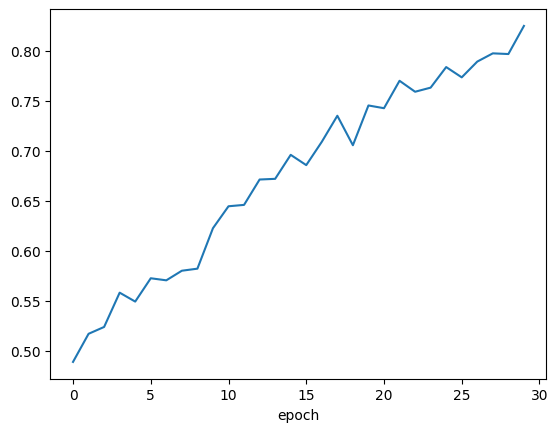

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')

1/1 [==============================] - 0s 213ms/step
Predict is:  Teacher


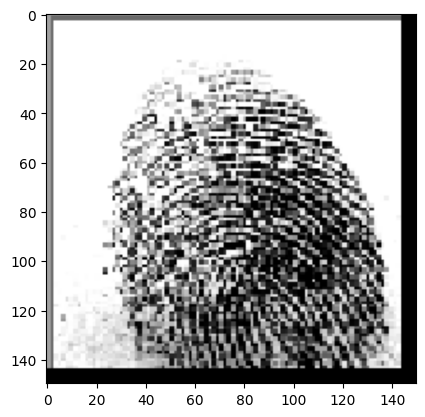

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1/chitay/Test/Test/260__M_Right_little_finger.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Doctor','Engineer','Farmer','Policeman','Singer','Teacher']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 197ms/step
Predict is:  Singer


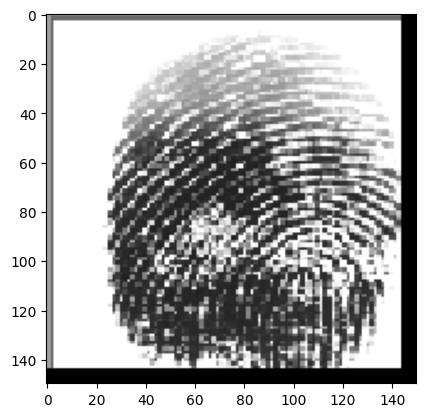

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1/chitay/Test/Test/264__M_Left_index_finger.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Doctor','Engineer','Farmer','Policeman','Singer','Teacher']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 52ms/step
Predict is:  Doctor


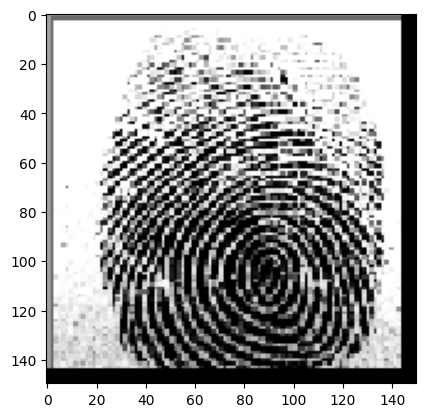

In [ ]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/bai1/chitay/Test/Test/262__M_Left_index_finger.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Doctor','Engineer','Farmer','Policeman','Singer','Teacher']
print('Predict is: ',Label[int(np.argmax(classification_flower_model.predict(img),axis=-1))])